TEAM: ML MAVERICS

Homework Week 2: Fractal Clustering

# Step 1: Initial Data Preparation
We'll first prepare our data for fractal clustering by:
- Selecting relevant features
- Scaling the data
- Initial data visualization

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('dailyActivity_merged.csv')

# Select features for clustering
features = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes',
           'FairlyActiveMinutes', 'LightlyActiveMinutes',
           'SedentaryMinutes', 'Calories']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Create DataFrame with scaled features
X_scaled = pd.DataFrame(X, columns=features)

print("Shape of scaled data:", X_scaled.shape)
print("\nFirst few rows of scaled data:")
print(X_scaled.head())

Shape of scaled data: (457, 7)

First few rows of scaled data:
   TotalSteps  TotalDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0    0.826587       0.599979           0.566891            -0.029584   
1    2.051417       1.688854           2.505409             0.108656   
2    1.147769       0.948223           1.363068            -0.223120   
3    1.239561       1.046320           0.774589             0.191600   
4    1.018888       0.781458           0.393809             0.412784   

   LightlyActiveMinutes  SedentaryMinutes  Calories  
0              0.286143         -0.568189 -0.454771  
1              0.851385         -1.209800 -0.043522  
2              0.802234         -1.159303 -0.301320  
3              0.441790          0.251647 -0.316051  
4              0.597436         -0.689976 -0.372521  


# Step 1.A: Initial Clustering Analysis
We'll perform the first level of clustering to:
- Determine optimal k using elbow method
- Visualize cluster distributions
- Store initial cluster assignments

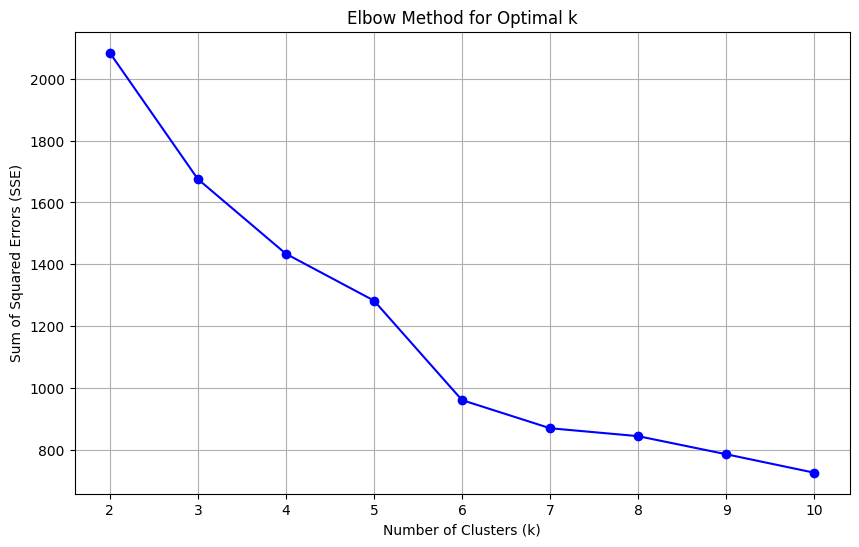

SSE values for each k:
k=2: 2084.25
k=3: 1675.69
k=4: 1434.13
k=5: 1282.61
k=6: 960.94
k=7: 869.95
k=8: 844.34
k=9: 785.85
k=10: 726.11


In [ ]:
# Function to plot elbow curve
def plot_elbow_curve(X, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    return sse

# Plot elbow curve for initial clustering
k_range = range(2, 11)
sse_values = plot_elbow_curve(X_scaled, k_range)

print("SSE values for each k:")
for k, sse in zip(k_range, sse_values):
    print(f"k={k}: {sse:.2f}")

# Step 1.B: First Level Fractal Clustering
Based on the elbow curve, we'll:
- Apply initial k-means clustering
- Analyze cluster characteristics
- Prepare for sub-clustering

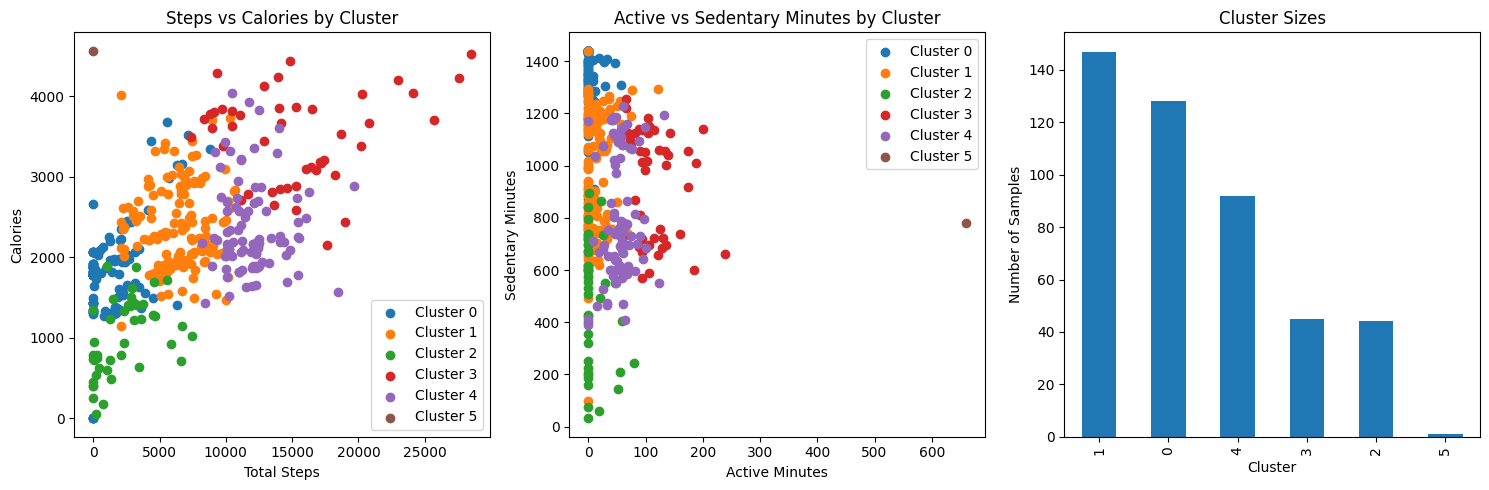


Cluster Statistics:

Cluster 0 Statistics:
       TotalSteps  TotalDistance  VeryActiveMinutes  FairlyActiveMinutes  \
count      128.00         128.00             128.00               128.00   
mean      1334.34           0.93               1.14                 1.05   
std       1815.50           1.28               5.70                 4.32   
min          0.00           0.00               0.00                 0.00   
25%          0.00           0.00               0.00                 0.00   
50%        273.00           0.19               0.00                 0.00   
75%       2147.75           1.58               0.00                 0.00   
max       8778.00           6.29              46.00                30.00   

       LightlyActiveMinutes  SedentaryMinutes  Calories  
count                128.00            128.00    128.00  
mean                  40.68           1364.05   1801.41  
std                   55.74            133.09    594.50  
min                    0.00            

In [ ]:
# Perform initial clustering with optimal k=6 (based on elbow curve analysis)
initial_k = 6  # Updated from 4 to 6 based on elbow plot
initial_kmeans = KMeans(n_clusters=initial_k, random_state=42)
initial_clusters = initial_kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Level1_Cluster'] = initial_clusters

# Visualize cluster distributions
plt.figure(figsize=(15, 5))

# Plot 1: Steps vs Calories by cluster
plt.subplot(1, 3, 1)
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    plt.scatter(cluster_data['TotalSteps'],
                cluster_data['Calories'],
                label=f'Cluster {i}')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.title('Steps vs Calories by Cluster')
plt.legend()

# Plot 2: Active vs Sedentary Minutes
plt.subplot(1, 3, 2)
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    plt.scatter(cluster_data['VeryActiveMinutes'] +
                cluster_data['FairlyActiveMinutes'],
                cluster_data['SedentaryMinutes'],
                label=f'Cluster {i}')
plt.xlabel('Active Minutes')
plt.ylabel('Sedentary Minutes')
plt.title('Active vs Sedentary Minutes by Cluster')
plt.legend()

# Plot 3: Cluster sizes
plt.subplot(1, 3, 3)
df['Level1_Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('Cluster Sizes')

plt.tight_layout()
plt.show()

# Print cluster statistics with more detailed analysis
print("\nCluster Statistics:")
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    print(f"\nCluster {i} Statistics:")
    print(cluster_data[features].describe().round(2))

    # Additional insights for each cluster
    print(f"\nCluster {i} Key Characteristics:")
    print(f"Size: {len(cluster_data)} samples ({(len(cluster_data)/len(df)*100):.1f}% of total)")
    print("Average daily metrics:")
    print(f"- Steps: {cluster_data['TotalSteps'].mean():.0f}")
    print(f"- Calories: {cluster_data['Calories'].mean():.0f}")
    print(f"- Active Minutes: {(cluster_data['VeryActiveMinutes'].mean() + cluster_data['FairlyActiveMinutes'].mean()):.0f}")
    print(f"- Sedentary Minutes: {cluster_data['SedentaryMinutes'].mean():.0f}")

# Step 1.C: Implementing Fractal Sub-clustering
In this step, we will:
- Implement recursive sub-clustering for each initial cluster
- Track cluster quality metrics
- Visualize sub-cluster formations


Analyzing Cluster 0


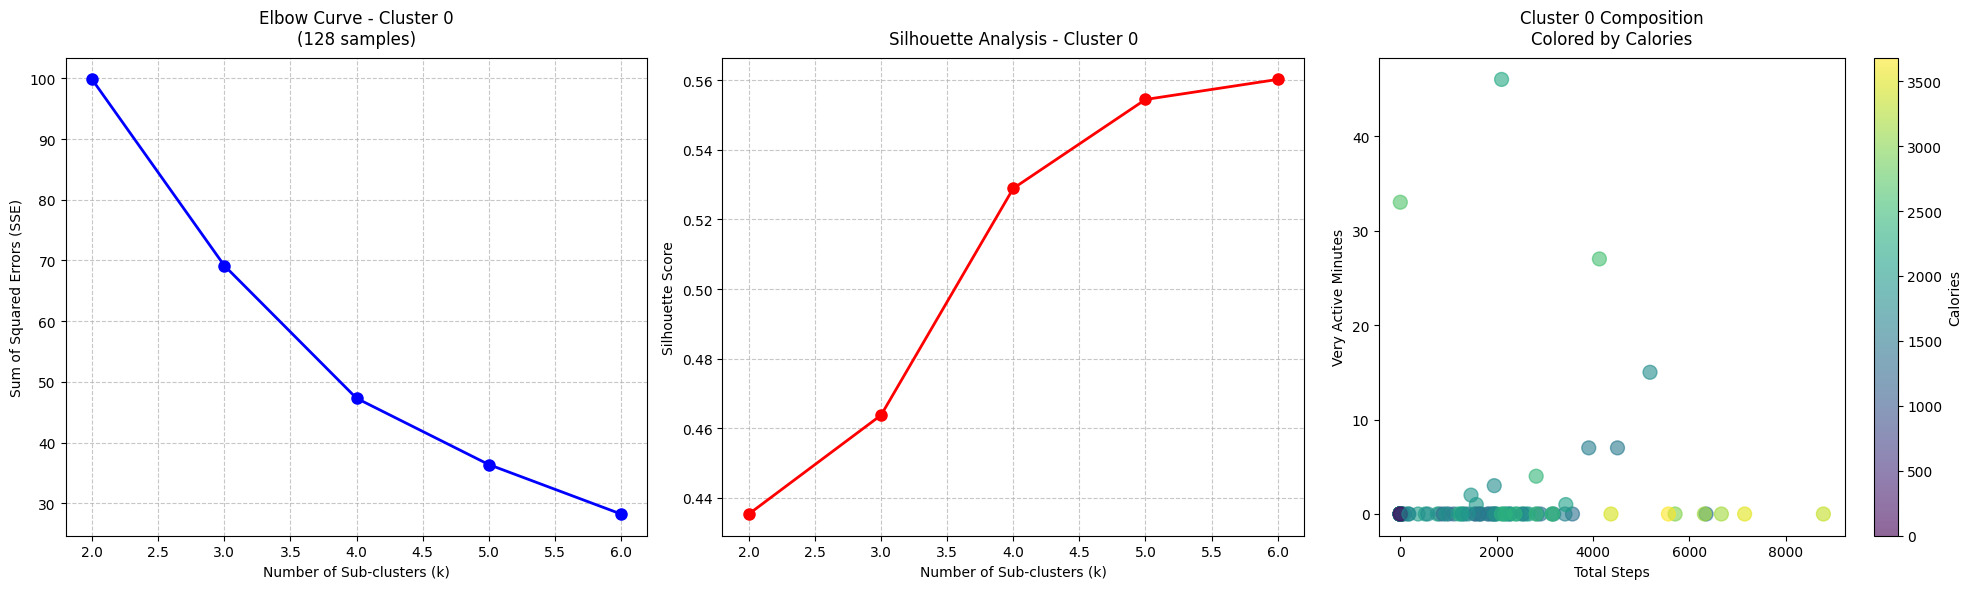


Sub-clustering Metrics:
------------------------------
Samples in cluster: 128

Metrics Summary:
   K     SSE  Silhouette Score
0  2  99.819             0.435
1  3  69.160             0.464
2  4  47.316             0.529
3  5  36.401             0.555
4  6  28.256             0.560

Best k based on Silhouette Score: 6
Suggested k from elbow method: 3

Analyzing Cluster 1


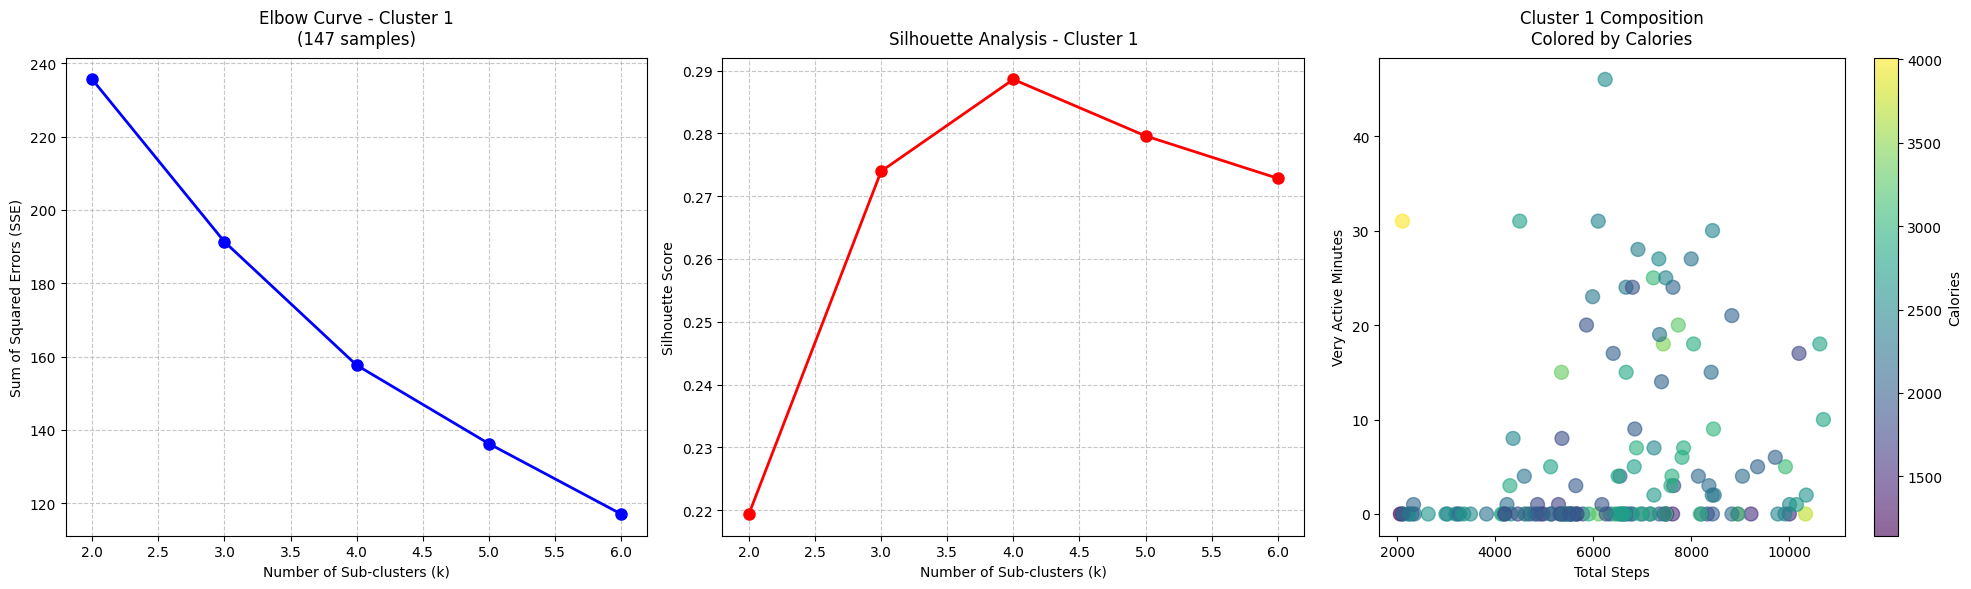


Sub-clustering Metrics:
------------------------------
Samples in cluster: 147

Metrics Summary:
   K      SSE  Silhouette Score
0  2  235.640             0.219
1  3  191.328             0.274
2  4  157.637             0.289
3  5  136.212             0.280
4  6  117.009             0.273

Best k based on Silhouette Score: 4
Suggested k from elbow method: 3

Analyzing Cluster 2


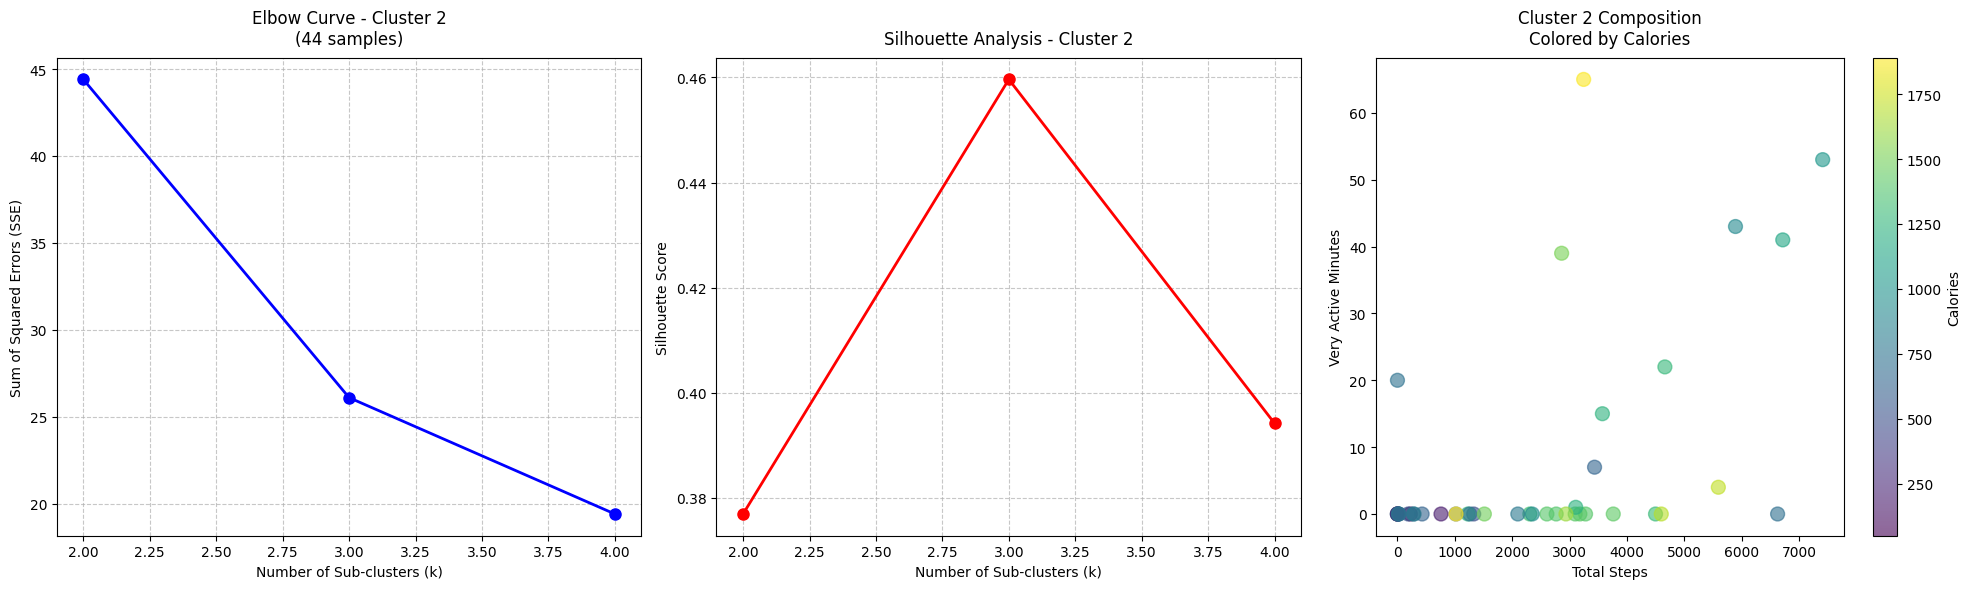


Sub-clustering Metrics:
------------------------------
Samples in cluster: 44

Metrics Summary:
   K     SSE  Silhouette Score
0  2  44.403             0.377
1  3  26.092             0.460
2  4  19.398             0.394

Best k based on Silhouette Score: 3
Suggested k from elbow method: 2

Analyzing Cluster 3


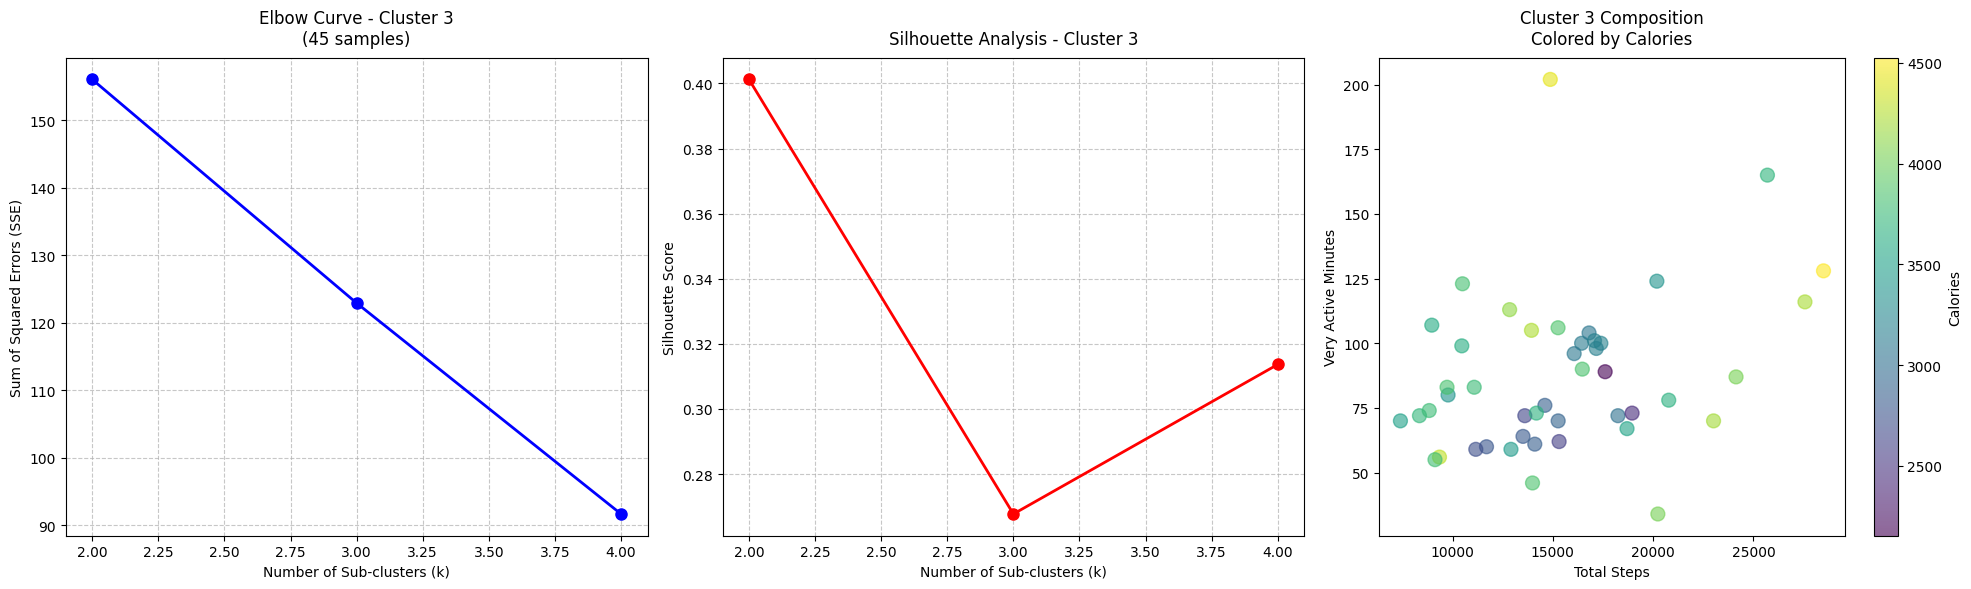


Sub-clustering Metrics:
------------------------------
Samples in cluster: 45

Metrics Summary:
   K      SSE  Silhouette Score
0  2  156.017             0.401
1  3  122.886             0.268
2  4   91.644             0.314

Best k based on Silhouette Score: 2
Suggested k from elbow method: 2

Analyzing Cluster 4


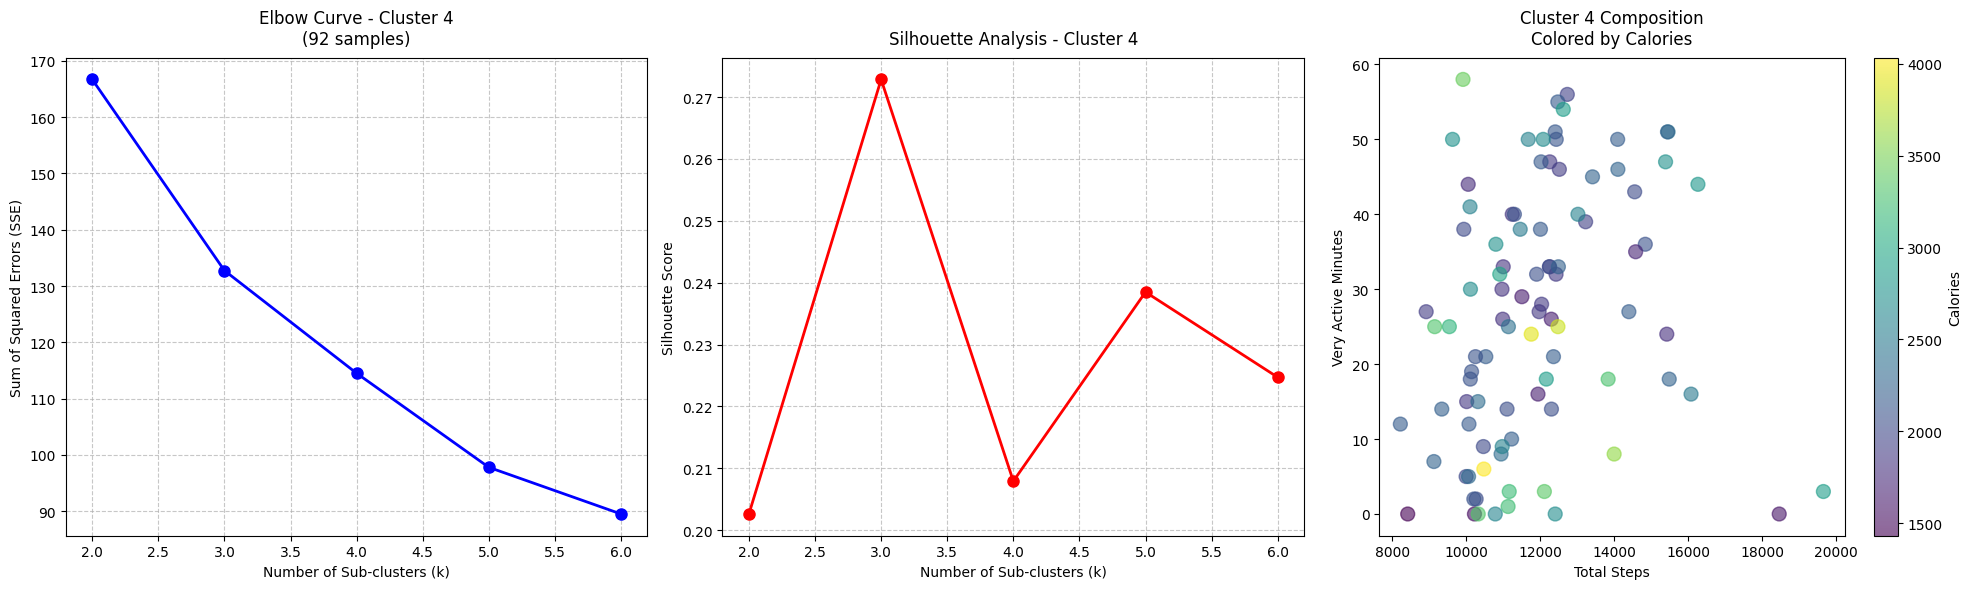


Sub-clustering Metrics:
------------------------------
Samples in cluster: 92

Metrics Summary:
   K      SSE  Silhouette Score
0  2  166.705             0.203
1  3  132.746             0.273
2  4  114.498             0.208
3  5   97.785             0.238
4  6   89.491             0.225

Best k based on Silhouette Score: 3
Suggested k from elbow method: 2

Analyzing Cluster 5
Insufficient samples (1 < 30)
Cluster 5 has insufficient samples for sub-clustering


In [ ]:
def perform_sub_clustering(data, features, min_samples=30):
    """
    Perform sub-clustering analysis on given data cluster

    Parameters:
    -----------
    data : DataFrame
        The dataset for sub-clustering
    features : list
        List of feature columns to use
    min_samples : int, default=30
        Minimum number of samples required for sub-clustering

    Returns:
    --------
    tuple : (k_range, sse, silhouette_scores, kmeans_models)
        k_range: list of k values tested
        sse: list of SSE scores for each k
        silhouette_scores: list of silhouette scores for each k
        kmeans_models: dictionary of fitted KMeans models for each k
    """
    if len(data) < min_samples:
        print(f"Insufficient samples ({len(data)} < {min_samples})")
        return None, None, None, None

    # Calculate maximum k based on data size
    max_k = min(6, len(data)//10)
    if max_k < 2:
        print(f"Data size too small for meaningful sub-clustering")
        return None, None, None, None

    k_range = list(range(2, max_k + 1))
    sse = []
    silhouette_scores = []
    kmeans_models = {}

    for k in k_range:
        # Fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data[features])

        # Store metrics
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data[features], labels))
        kmeans_models[k] = kmeans

    return k_range, sse, silhouette_scores, kmeans_models

# Perform and visualize sub-clustering for each initial cluster
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i].copy()
    scaled_cluster_data = X_scaled[df['Level1_Cluster'] == i]

    print(f"\n{'='*50}")
    print(f"Analyzing Cluster {i}")
    print(f"{'='*50}")

    k_range, sse, silhouette_scores, kmeans_models = perform_sub_clustering(
        scaled_cluster_data, features)

    if all(x is not None for x in [k_range, sse, silhouette_scores, kmeans_models]):
        plt.figure(figsize=(20, 6))

        # Plot 1: Enhanced Elbow Curve
        plt.subplot(1, 3, 1)
        plt.plot(k_range, sse, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Number of Sub-clusters (k)', fontsize=10)
        plt.ylabel('Sum of Squared Errors (SSE)', fontsize=10)
        plt.title(f'Elbow Curve - Cluster {i}\n({len(cluster_data)} samples)',
                 fontsize=12, pad=10)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Plot 2: Enhanced Silhouette Analysis
        plt.subplot(1, 3, 2)
        plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
        plt.xlabel('Number of Sub-clusters (k)', fontsize=10)
        plt.ylabel('Silhouette Score', fontsize=10)
        plt.title(f'Silhouette Analysis - Cluster {i}', fontsize=12, pad=10)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Plot 3: Enhanced Cluster Composition
        plt.subplot(1, 3, 3)
        scatter = plt.scatter(
            cluster_data['TotalSteps'],
            cluster_data['VeryActiveMinutes'],
            c=cluster_data['Calories'],
            cmap='viridis',
            alpha=0.6,
            s=100
        )
        plt.colorbar(scatter, label='Calories')
        plt.xlabel('Total Steps', fontsize=10)
        plt.ylabel('Very Active Minutes', fontsize=10)
        plt.title(f'Cluster {i} Composition\nColored by Calories',
                 fontsize=12, pad=10)

        plt.tight_layout()
        plt.show()

        # Print detailed metrics and analysis
        print("\nSub-clustering Metrics:")
        print("-" * 30)
        print(f"Samples in cluster: {len(cluster_data)}")

        # Create metrics summary table
        metrics_summary = pd.DataFrame({
            'K': k_range,
            'SSE': sse,
            'Silhouette Score': silhouette_scores
        })
        print("\nMetrics Summary:")
        print(metrics_summary.round(3))

        # Identify optimal k based on metrics
        best_silhouette_k = k_range[np.argmax(silhouette_scores)]
        print(f"\nBest k based on Silhouette Score: {best_silhouette_k}")

        # Calculate elbow point
        elbow_k = k_range[np.argmax(np.diff(np.diff(sse)))]
        print(f"Suggested k from elbow method: {elbow_k}")
    else:
        print(f"Cluster {i} has insufficient samples for sub-clustering")

# Step 1.D: Optimal Sub-cluster Selection
Let's analyze the results to determine:
- Which clusters should be further sub-divided
- Optimal number of sub-clusters for each cluster

In [ ]:
def find_optimal_k(sse, silhouette_scores, k_range):
    """
    Determine optimal k using both SSE and silhouette scores
    """
    # Calculate SSE percentage drops
    sse_drops = [((sse[i] - sse[i+1])/sse[i])*100 for i in range(len(sse)-1)]

    # Find optimal k using elbow method (significant drop in SSE)
    optimal_k_sse = k_range[next((i for i, drop in enumerate(sse_drops)
                                 if drop < 20), 0)]

    # Find optimal k using silhouette score (highest score)
    optimal_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]

    # Combine both metrics (prefer silhouette if scores are good)
    if max(silhouette_scores) > 0.5:
        return optimal_k_silhouette
    else:
        return optimal_k_sse

# Analyze optimal sub-clustering for each initial cluster
for i in range(initial_k):
    cluster_data = X_scaled[df['Level1_Cluster'] == i]
    # Add kmeans_models to unpacking to match the return values
    k_range, sse, silhouette_scores, kmeans_models = perform_sub_clustering(cluster_data, features)

    if k_range is not None and len(k_range) > 0:
        optimal_k = find_optimal_k(sse, silhouette_scores, k_range)

        print(f"\nCluster {i} Analysis:")
        print(f"Number of samples: {len(cluster_data)}")
        print(f"Optimal number of sub-clusters: {optimal_k}")
        print(f"Best silhouette score: {max(silhouette_scores):.3f}")
        print(f"SSE reduction at optimal k: {((sse[0] - sse[k_range.index(optimal_k)])/sse[0]*100):.2f}%")


Cluster 0 Analysis:
Number of samples: 128
Optimal number of sub-clusters: 6
Best silhouette score: 0.560
SSE reduction at optimal k: 71.69%

Cluster 1 Analysis:
Number of samples: 147
Optimal number of sub-clusters: 2
Best silhouette score: 0.289
SSE reduction at optimal k: 0.00%

Cluster 2 Analysis:
Number of samples: 44
Optimal number of sub-clusters: 2
Best silhouette score: 0.460
SSE reduction at optimal k: 0.00%

Cluster 3 Analysis:
Number of samples: 45
Optimal number of sub-clusters: 2
Best silhouette score: 0.401
SSE reduction at optimal k: 0.00%

Cluster 4 Analysis:
Number of samples: 92
Optimal number of sub-clusters: 3
Best silhouette score: 0.273
SSE reduction at optimal k: 20.37%
Insufficient samples (1 < 30)


# Step 1.1: Implementing Objective Functions
In this step, we will:
- Define 2 fitness-focused objective functions
- Apply them to evaluate clusters
- Determine cluster quality and stopping criteria

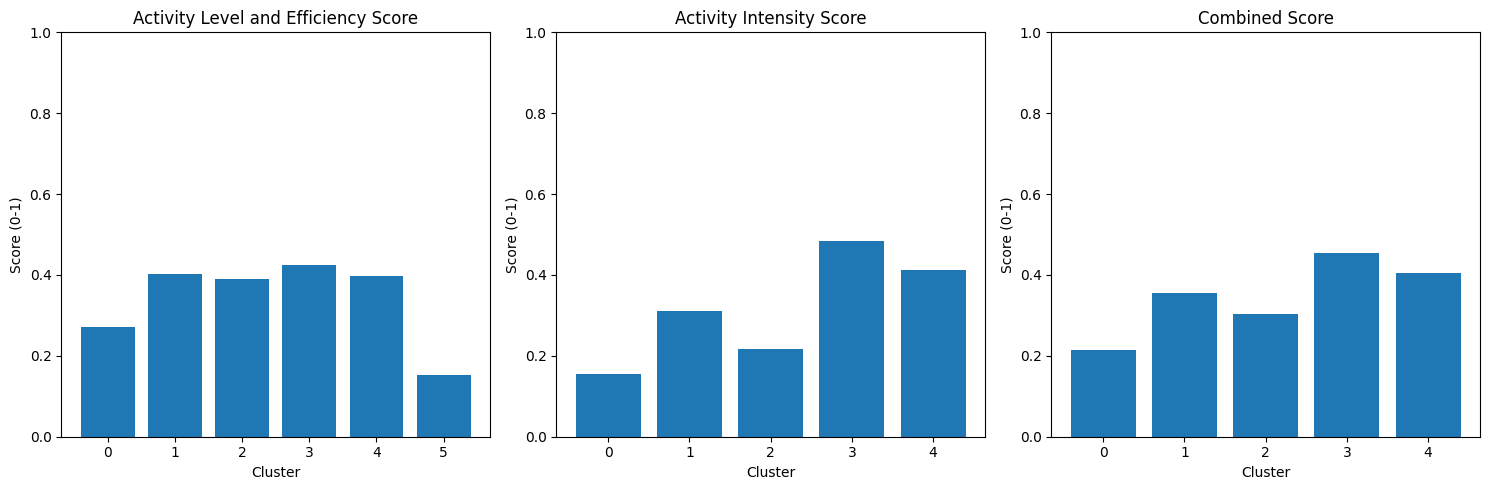


Cluster Analysis:

Cluster 0 (Size: 128):
Activity Level Score: 0.272
Activity Intensity Score: 0.156
Combined Score: 0.214

Cluster 1 (Size: 147):
Activity Level Score: 0.402
Activity Intensity Score: 0.311
Combined Score: 0.356

Cluster 2 (Size: 44):
Activity Level Score: 0.391
Activity Intensity Score: 0.218
Combined Score: 0.304

Cluster 3 (Size: 45):
Activity Level Score: 0.425
Activity Intensity Score: 0.484
Combined Score: 0.454

Cluster 4 (Size: 92):
Activity Level Score: 0.398
Activity Intensity Score: 0.412
Combined Score: 0.405

Cluster 5 (Size: 1):
Activity Level Score: 0.153
Activity Intensity Score: nan
Combined Score: nan


In [ ]:
def objective_function_1(cluster_data):
    """
    Revised Objective Function 1: Activity Level and Efficiency Score
    Focuses on activity patterns and efficiency with improved normalization
    """
    # 1. Activity Level Score (0-1)
    total_active_minutes = (cluster_data['VeryActiveMinutes'] +
                          cluster_data['FairlyActiveMinutes'] +
                          cluster_data['LightlyActiveMinutes'])
    total_minutes = total_active_minutes + cluster_data['SedentaryMinutes']
    activity_score = (total_active_minutes / total_minutes).mean()

    # 2. Steps Efficiency (0-1)
    avg_steps = cluster_data['TotalSteps'].mean()
    max_steps = df['TotalSteps'].max()  # Using global max for normalization
    steps_score = min(avg_steps / max_steps, 1)

    # 3. Calorie Efficiency (0-1)
    calories_per_step = cluster_data['Calories'] / (cluster_data['TotalSteps'] + 1)
    calories_score = 1 - (calories_per_step / calories_per_step.max()).mean()

    # Combine scores with equal weights
    final_score = (activity_score + steps_score + calories_score) / 3
    return final_score

def objective_function_2(cluster_data):
    """
    Revised Objective Function 2: Activity Intensity and Consistency Score
    Focuses on exercise intensity and behavior consistency
    """
    # 1. Activity Intensity (0-1)
    very_active_ratio = (cluster_data['VeryActiveMinutes'] /
                        (cluster_data['VeryActiveMinutes'] +
                         cluster_data['FairlyActiveMinutes'] +
                         cluster_data['LightlyActiveMinutes'] + 1)).mean()

    # 2. Distance Coverage (0-1)
    total_distance = (cluster_data['VeryActiveDistance'] +
                     cluster_data['ModeratelyActiveDistance'] +
                     cluster_data['LightActiveDistance'])
    max_distance = df[['VeryActiveDistance', 'ModeratelyActiveDistance',
                      'LightActiveDistance']].sum(axis=1).max()
    distance_score = (total_distance / max_distance).mean()

    # 3. Activity Consistency (0-1)
    steps_std = cluster_data['TotalSteps'].std()
    steps_mean = cluster_data['TotalSteps'].mean()
    cv = steps_std / (steps_mean + 1)  # Coefficient of variation
    consistency_score = 1 / (1 + cv)    # Transform to 0-1 scale

    # Combine scores with equal weights
    final_score = (very_active_ratio + distance_score + consistency_score) / 3
    return final_score

# Calculate scores for each cluster
cluster_scores = {}
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]

    score1 = objective_function_1(cluster_data)
    score2 = objective_function_2(cluster_data)
    combined_score = (score1 + score2) / 2

    cluster_scores[i] = {
        'Score1': score1,
        'Score2': score2,
        'Combined_Score': combined_score,
        'Size': len(cluster_data)
    }

# Visualize the revised scores
plt.figure(figsize=(15, 5))

# Plot 1: Activity Level Score
plt.subplot(1, 3, 1)
plt.bar(cluster_scores.keys(), [s['Score1'] for s in cluster_scores.values()])
plt.ylim(0, 1)
plt.title('Activity Level and Efficiency Score')
plt.xlabel('Cluster')
plt.ylabel('Score (0-1)')

# Plot 2: Activity Intensity Score
plt.subplot(1, 3, 2)
plt.bar(cluster_scores.keys(), [s['Score2'] for s in cluster_scores.values()])
plt.ylim(0, 1)
plt.title('Activity Intensity Score')
plt.xlabel('Cluster')
plt.ylabel('Score (0-1)')

# Plot 3: Combined Score
plt.subplot(1, 3, 3)
plt.bar(cluster_scores.keys(), [s['Combined_Score'] for s in cluster_scores.values()])
plt.ylim(0, 1)
plt.title('Combined Score')
plt.xlabel('Cluster')
plt.ylabel('Score (0-1)')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nCluster Analysis:")
for cluster, scores in cluster_scores.items():
    print(f"\nCluster {cluster} (Size: {scores['Size']}):")
    print(f"Activity Level Score: {scores['Score1']:.3f}")
    print(f"Activity Intensity Score: {scores['Score2']:.3f}")
    print(f"Combined Score: {scores['Combined_Score']:.3f}")

# Step 1.2: Computing SSE and Silhouette Scores
In this step, we will:
- Calculate SSE and Silhouette scores for each cluster
- Analyze cluster validation metrics
- Visualize cluster quality metrics

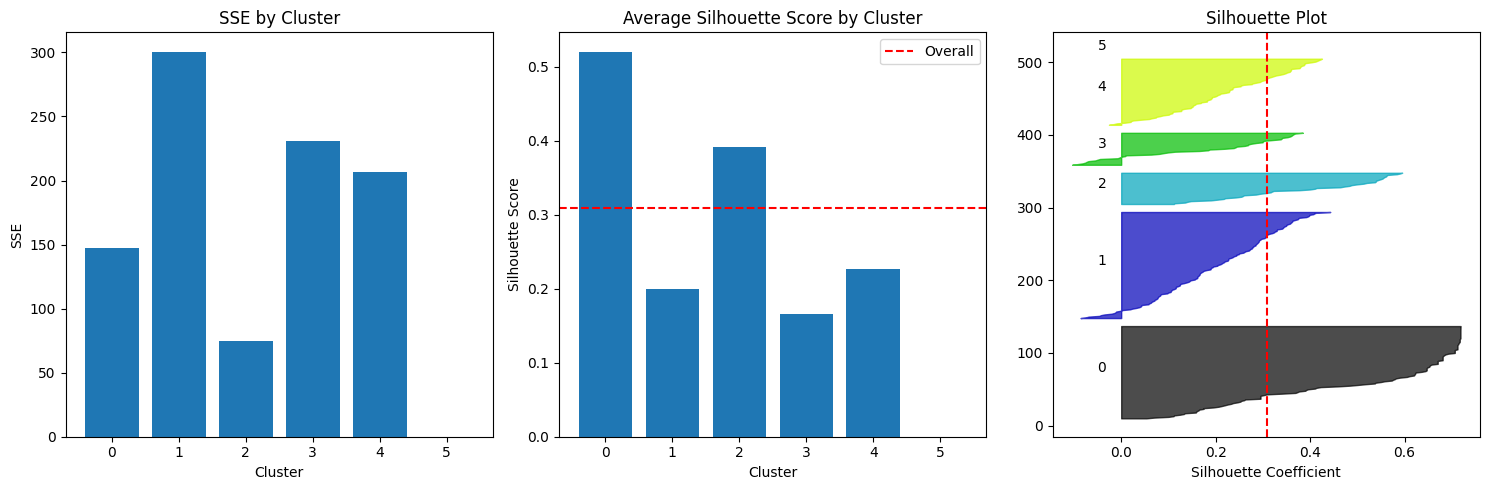


Overall Clustering Metrics:
Total SSE: 960.94
Overall Silhouette Score: 0.309

Cluster-wise Metrics:

Cluster 0:
Size: 128 samples
SSE: 147.59
Average Silhouette Score: 0.520

Cluster 1:
Size: 147 samples
SSE: 300.65
Average Silhouette Score: 0.199

Cluster 2:
Size: 44 samples
SSE: 75.04
Average Silhouette Score: 0.391

Cluster 3:
Size: 45 samples
SSE: 230.73
Average Silhouette Score: 0.165

Cluster 4:
Size: 92 samples
SSE: 206.92
Average Silhouette Score: 0.226

Cluster 5:
Size: 1 samples
SSE: 0.00
Average Silhouette Score: 0.000


In [ ]:
# Import required functions
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Function to calculate SSE correctly
def calculate_sse(X, labels, centroids):
    sse = np.zeros(len(centroids))
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        centroid = centroids[i].reshape(1, -1)  # Reshape to 2D array
        # Calculate squared distances for each point in cluster
        squared_distances = np.sum((cluster_points - centroid) ** 2, axis=1)
        sse[i] = np.sum(squared_distances)
    return sse

# Get cluster labels and features
labels = df['Level1_Cluster']
centroids = np.array([X_scaled[labels == i].mean(axis=0) for i in range(initial_k)])

# Calculate SSE and Silhouette scores
sse_values = calculate_sse(X_scaled, labels, centroids)
overall_silhouette = silhouette_score(X_scaled, labels)
silhouette_values = silhouette_samples(X_scaled, labels)

# Calculate per-cluster metrics
cluster_metrics = {}
for i in range(initial_k):
    cluster_points = X_scaled[labels == i]
    cluster_silhouette = silhouette_values[labels == i]

    cluster_metrics[i] = {
        'sse': sse_values[i],
        'avg_silhouette': np.mean(cluster_silhouette),
        'size': len(cluster_points)
    }

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: SSE by Cluster
plt.subplot(1, 3, 1)
plt.bar(range(initial_k), sse_values)
plt.title('SSE by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SSE')

# Plot 2: Average Silhouette Score by Cluster
plt.subplot(1, 3, 2)
silhouette_averages = [metrics['avg_silhouette'] for metrics in cluster_metrics.values()]
plt.bar(range(initial_k), silhouette_averages)
plt.axhline(y=overall_silhouette, color='r', linestyle='--', label='Overall')
plt.title('Average Silhouette Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot 3: Silhouette Plot
plt.subplot(1, 3, 3)
y_lower = 10
for i in range(initial_k):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = len(cluster_silhouette_values)
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / initial_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.axvline(x=overall_silhouette, color="red", linestyle="--")

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOverall Clustering Metrics:")
print(f"Total SSE: {np.sum(sse_values):.2f}")
print(f"Overall Silhouette Score: {overall_silhouette:.3f}")

print("\nCluster-wise Metrics:")
for cluster, metrics in cluster_metrics.items():
    print(f"\nCluster {cluster}:")
    print(f"Size: {metrics['size']} samples")
    print(f"SSE: {metrics['sse']:.2f}")
    print(f"Average Silhouette Score: {metrics['avg_silhouette']:.3f}")

# Step 2: Golden Cluster Identification and Visualization
In this step, we will:
1. Combine objective function scores with validation metrics
2. Identify the golden cluster
3. Create comprehensive visualizations of cluster characteristics

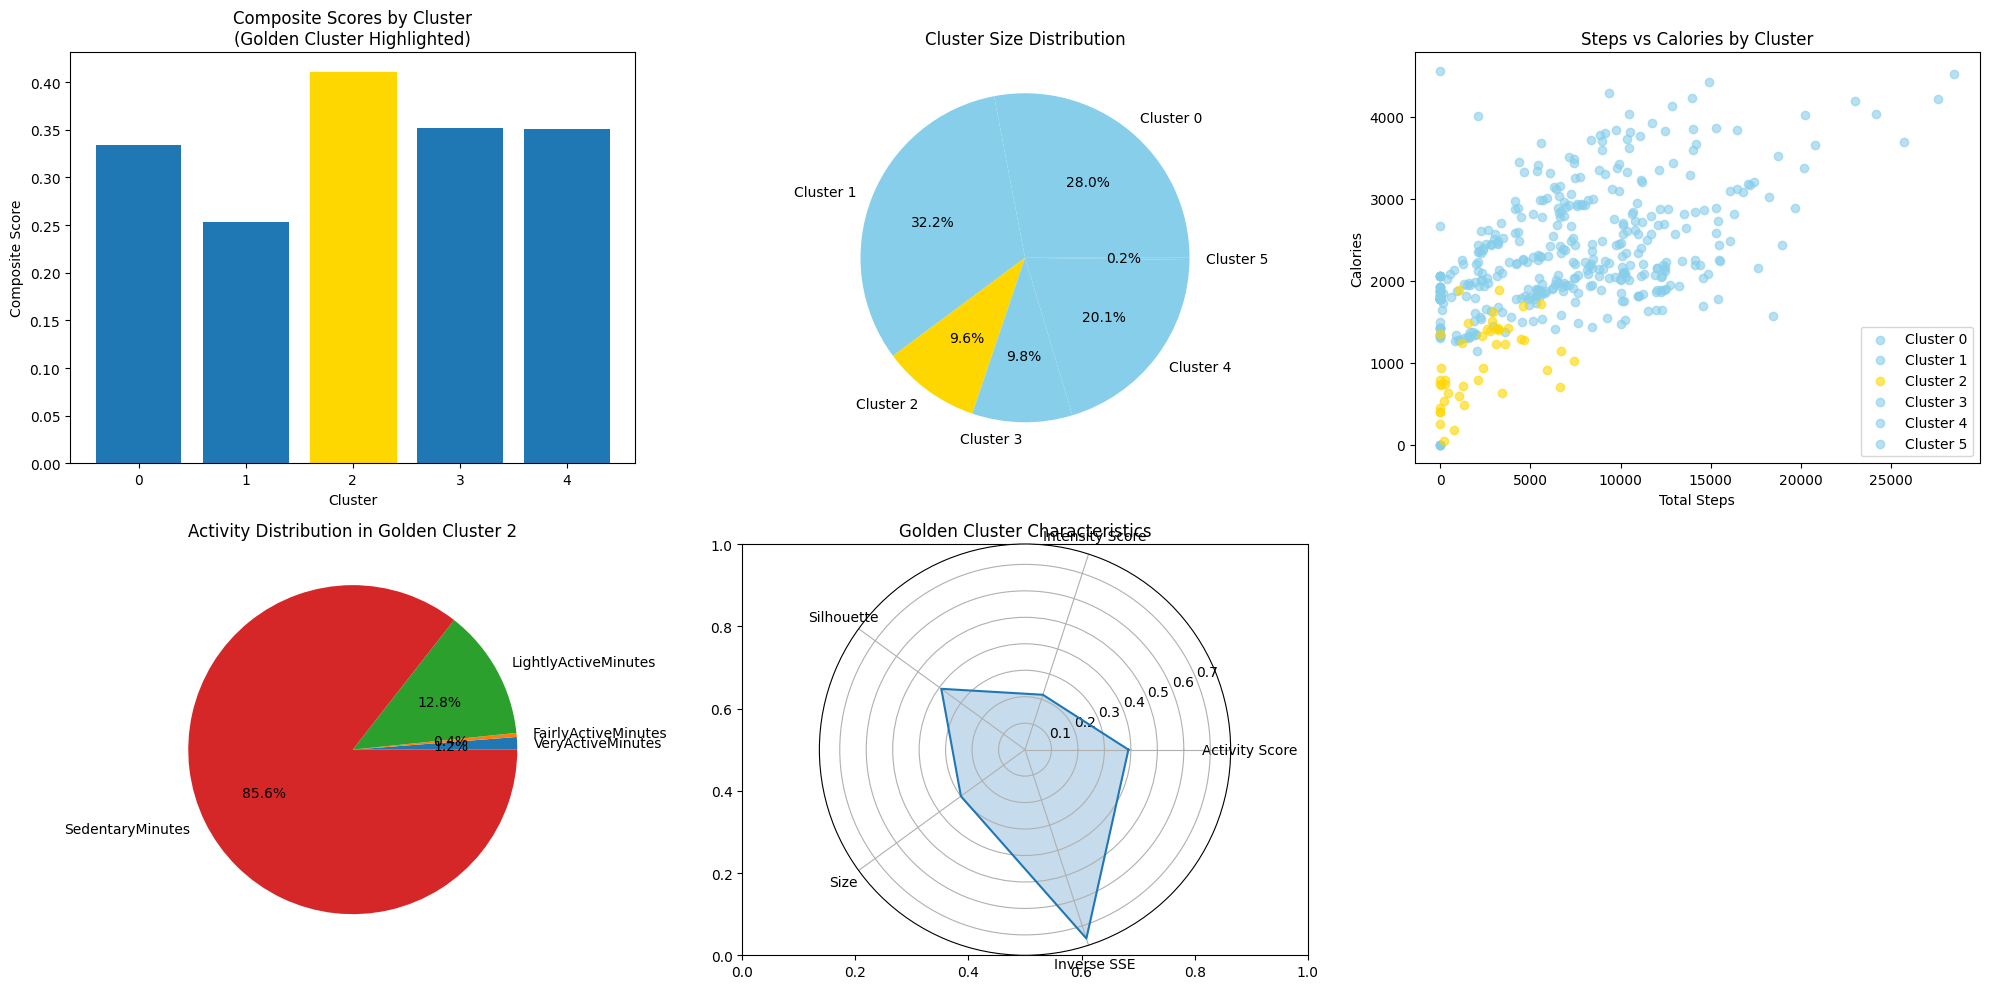


Golden Cluster Analysis (Cluster 2):
--------------------------------------------------
Composite Score: 0.411
Cluster Size: 44 samples

Characteristics:
Activity Level Score: 0.391
Intensity Score: 0.218
Silhouette Score: 0.391
SSE: 75.039

Golden Cluster Statistics:
        TotalSteps  TotalDistance  VeryActiveMinutes  FairlyActiveMinutes  \
count    44.000000      44.000000          44.000000            44.000000   
mean   2277.750000       1.535000           7.045455             2.295455   
std    2107.573399       1.460961          16.049277             5.394138   
min       0.000000       0.000000           0.000000             0.000000   
25%     264.500000       0.177500           0.000000             0.000000   
50%    2203.000000       1.420000           0.000000             0.000000   
75%    3318.250000       2.262500           0.250000             0.000000   
max    7413.000000       5.770000          65.000000            25.000000   

       LightlyActiveMinutes  Sedenta

In [ ]:
# Combine all metrics to find golden cluster
golden_metrics = {}
for i in range(initial_k):
    # Get all metrics
    obj_scores = cluster_scores[i]
    validation_metrics = cluster_metrics[i]

    # Calculate composite score (normalized and weighted)
    composite_score = (
        0.3 * obj_scores['Score1'] +            # Activity Level Score
        0.3 * obj_scores['Score2'] +            # Activity Intensity Score
        0.2 * (1 - validation_metrics['sse']/np.max(sse_values)) +  # Normalized SSE (inverted)
        0.2 * validation_metrics['avg_silhouette']  # Silhouette Score
    )

    golden_metrics[i] = {
        'composite_score': composite_score,
        'size': validation_metrics['size'],
        'activity_score': obj_scores['Score1'],
        'intensity_score': obj_scores['Score2'],
        'sse': validation_metrics['sse'],
        'silhouette': validation_metrics['avg_silhouette']
    }

# Identify golden cluster
golden_cluster = max(golden_metrics.items(), key=lambda x: x[1]['composite_score'])[0]

# Create visualizations
plt.figure(figsize=(20, 10))

# Plot 1: Composite Scores
plt.subplot(2, 3, 1)
composite_scores = [m['composite_score'] for m in golden_metrics.values()]
bars = plt.bar(range(initial_k), composite_scores)
bars[golden_cluster].set_color('gold')
plt.title('Composite Scores by Cluster\n(Golden Cluster Highlighted)')
plt.xlabel('Cluster')
plt.ylabel('Composite Score')

# Plot 2: Cluster Sizes
plt.subplot(2, 3, 2)
cluster_data = df.groupby('Level1_Cluster').size()
plt.pie(cluster_data, labels=[f'Cluster {i}' for i in range(initial_k)],
        autopct='%1.1f%%', colors=['gold' if i == golden_cluster else 'skyblue'
                                  for i in range(initial_k)])
plt.title('Cluster Size Distribution')

# Plot 3: Activity Patterns
plt.subplot(2, 3, 3)
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    color = 'gold' if i == golden_cluster else 'skyblue'
    plt.scatter(cluster_data['TotalSteps'],
               cluster_data['Calories'],
               alpha=0.6,
               label=f'Cluster {i}',
               color=color)
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.title('Steps vs Calories by Cluster')
plt.legend()

# Plot 4: Activity Distribution
plt.subplot(2, 3, 4)
metrics = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
golden_cluster_data = df[df['Level1_Cluster'] == golden_cluster][metrics].mean()
plt.pie(golden_cluster_data, labels=metrics, autopct='%1.1f%%')
plt.title(f'Activity Distribution in Golden Cluster {golden_cluster}')

# Plot 5: Cluster Characteristics Radar Chart
plt.subplot(2, 3, 5)
characteristics = ['Activity Score', 'Intensity Score', 'Silhouette', 'Size', 'Inverse SSE']
angles = np.linspace(0, 2*np.pi, len(characteristics), endpoint=False)

# Normalize values for radar chart
values = [
    golden_metrics[golden_cluster]['activity_score'],
    golden_metrics[golden_cluster]['intensity_score'],
    golden_metrics[golden_cluster]['silhouette'],
    golden_metrics[golden_cluster]['size']/max(m['size'] for m in golden_metrics.values()),
    1 - golden_metrics[golden_cluster]['sse']/max(m['sse'] for m in golden_metrics.values())
]
values = np.concatenate((values, [values[0]]))  # complete the loop
angles = np.concatenate((angles, [angles[0]]))  # complete the loop

ax = plt.subplot(2, 3, 5, projection='polar')
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(characteristics)
plt.title('Golden Cluster Characteristics')

plt.tight_layout()
plt.show()

# Print Golden Cluster Analysis
print(f"\nGolden Cluster Analysis (Cluster {golden_cluster}):")
print("-" * 50)
print(f"Composite Score: {golden_metrics[golden_cluster]['composite_score']:.3f}")
print(f"Cluster Size: {golden_metrics[golden_cluster]['size']} samples")
print("\nCharacteristics:")
print(f"Activity Level Score: {golden_metrics[golden_cluster]['activity_score']:.3f}")
print(f"Intensity Score: {golden_metrics[golden_cluster]['intensity_score']:.3f}")
print(f"Silhouette Score: {golden_metrics[golden_cluster]['silhouette']:.3f}")
print(f"SSE: {golden_metrics[golden_cluster]['sse']:.3f}")

# Print key statistics of golden cluster
golden_data = df[df['Level1_Cluster'] == golden_cluster]
print("\nGolden Cluster Statistics:")
print(golden_data[features].describe())

# Project Write-up: Fitness Activity Pattern Analysis

## 2.1 Data Narrative
Main Research Questions:
1. What are the distinct patterns of physical activity among users, and how do these patterns relate to calorie burn and overall activity efficiency?
2. Can we identify the optimal activity patterns (golden cluster) that represent the most effective combination of activity intensity, duration, and health outcomes?

### 1. Business Task
- Primary Objective: Identify and analyze effective fitness patterns to provide personalized activity recommendations
- Stakeholders: Fitness app users, health coaches, wellness program managers
- Business Value:
 * Optimize user engagement through targeted activity suggestions
 * Improve health outcomes through data-driven activity planning
 * Enable personalized fitness coaching at scale

### 2. ML Task
Primary Focus: Clustering Analysis
- Task Type: Unsupervised Learning
- Specific Goals:
  1. Cluster users based on activity patterns
  2. Identify golden cluster representing optimal activity patterns
  3. Extract actionable insights from cluster characteristics

What we're clustering:
- Daily activity patterns including:
  * Steps and distance metrics
  * Activity intensity levels
  * Time distribution across activity types
  * Calorie burn efficiency

### 3. EDAV (Exploratory Data Analysis and Visualization)

Data Structure:
- Time-series data with daily measurements
- 15 features capturing various activity metrics
- 457 daily records

Key Distributions:

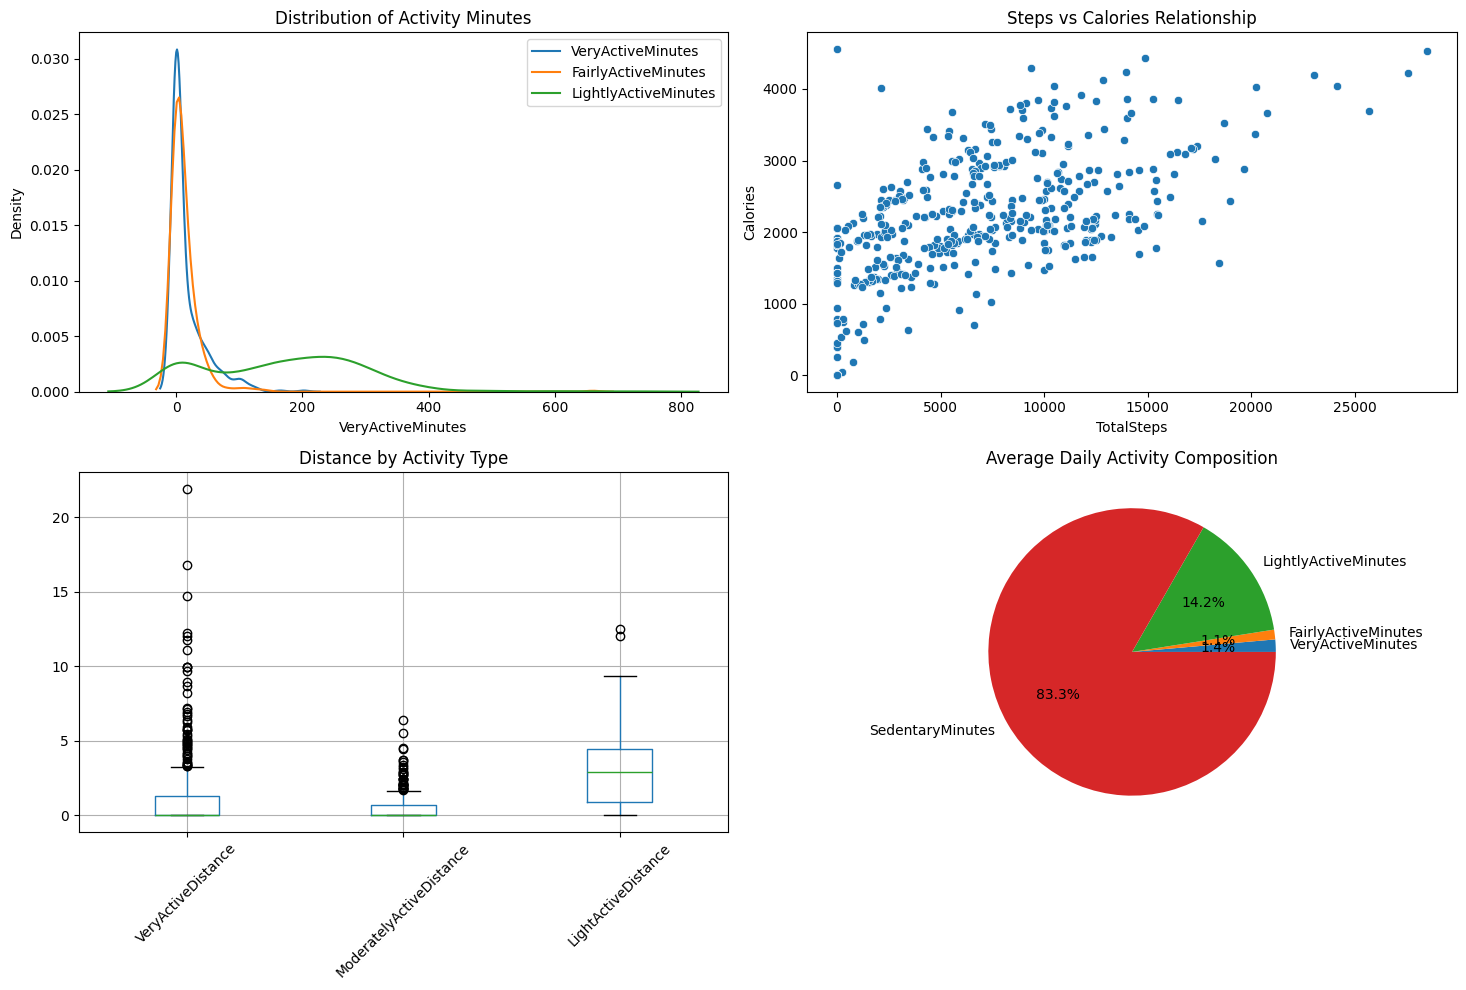

In [ ]:
# Visualize key feature distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Create distribution plots
plt.figure(figsize=(15, 10))

# Activity Minutes Distribution
plt.subplot(2, 2, 1)
for col in ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']:
    sns.kdeplot(data=df, x=col, label=col)
plt.title('Distribution of Activity Minutes')
plt.legend()

# Steps and Calories
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='TotalSteps', y='Calories')
plt.title('Steps vs Calories Relationship')

# Activity Distance Types
plt.subplot(2, 2, 3)
distance_cols = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
df[distance_cols].boxplot()
plt.title('Distance by Activity Type')
plt.xticks(rotation=45)

# Daily Activity Composition
plt.subplot(2, 2, 4)
activity_composition = df[['VeryActiveMinutes', 'FairlyActiveMinutes',
                         'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
plt.pie(activity_composition, labels=activity_composition.index, autopct='%1.1f%%')
plt.title('Average Daily Activity Composition')

plt.tight_layout()
plt.show()

### 4. Data Representation
Dataset 1: FitBit Fitness Tracker Data (Downloaded)
- Source: Kaggle FitBit Fitness Tracker Data
- Format: CSV
- Features: 15 columns including:
  * Temporal: ActivityDate
  * Categorical: Activity intensity levels
  * Numerical: Steps, Distance, Calories, Minutes
- Granularity: Daily activity records
- Size: 457 records

Dataset 2 (Planned for Scraping): Weather Data
- Source: Weather API (e.g., OpenWeatherMap)
- Target Data:
  * Daily weather conditions
  * Temperature
  * Precipitation
  * Humidity
  * Wind speed
- Purpose: Analyze environmental factors' impact on activity patterns
- Scraping Approach: API calls using activity dates to match weather conditions

# 2.2 Dataset Analysis and Data Collection Plan

## Current Dataset: FitBit Fitness Tracker Data
1. Dataset Details:
  - Name: dailyActivity_merged.csv
  - Size: 457 records
  - Features: 15 columns
  - Time Range: Daily activity records
  - Data Quality:
    * No missing values
    * Consistent data types
    * Properly formatted timestamps

2. Key Features:
  - Activity Metrics:
    * Steps, Distance, Calories
    * Active Minutes (Very, Fairly, Lightly)
    * Sedentary Minutes
  - Distance Categories:
    * Very Active Distance
    * Moderately Active Distance
    * Light Active Distance

In [ ]:
# Quick summary of current dataset
print("Dataset Overview:")
print("-" * 50)
print(f"Number of Records: {len(df)}")
print(f"Number of Features: {len(df.columns)}")
print("\nFeature Types:")
print(df.dtypes)

# Check data completeness
print("\nMissing Values:")
print(df.isnull().sum())

# Display sample records
print("\nSample Records:")
print(df.head())

Dataset Overview:
--------------------------------------------------
Number of Records: 457
Number of Features: 16

Feature Types:
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
Level1_Cluster                int32
dtype: object

Missing Values:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance   